# Chatbot para contestar preguntas frecuentes


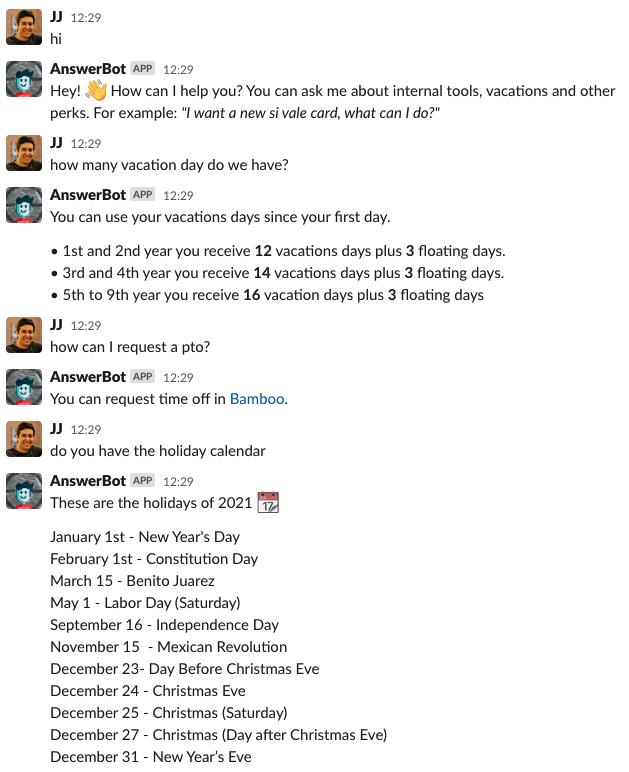

## La idea básica es medir la similitud entre dos oraciones, en nuestro caso posible_respuesta:pregunta

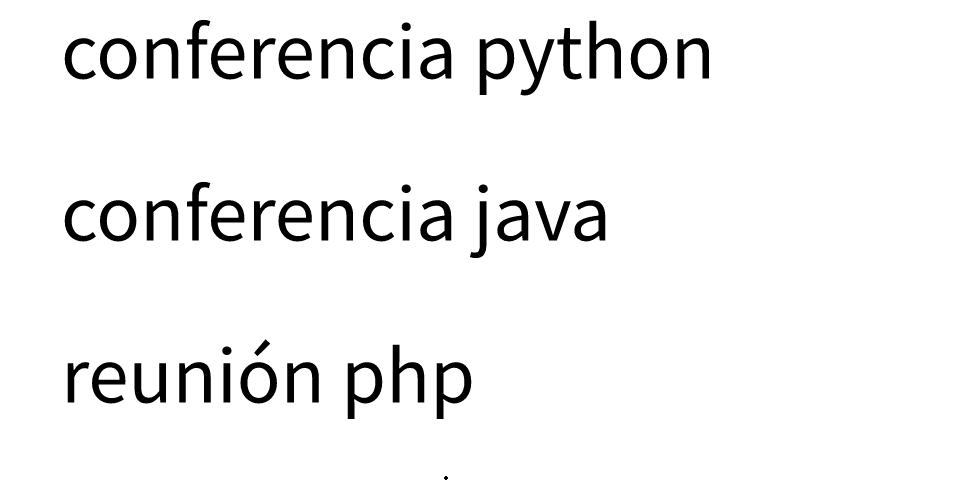

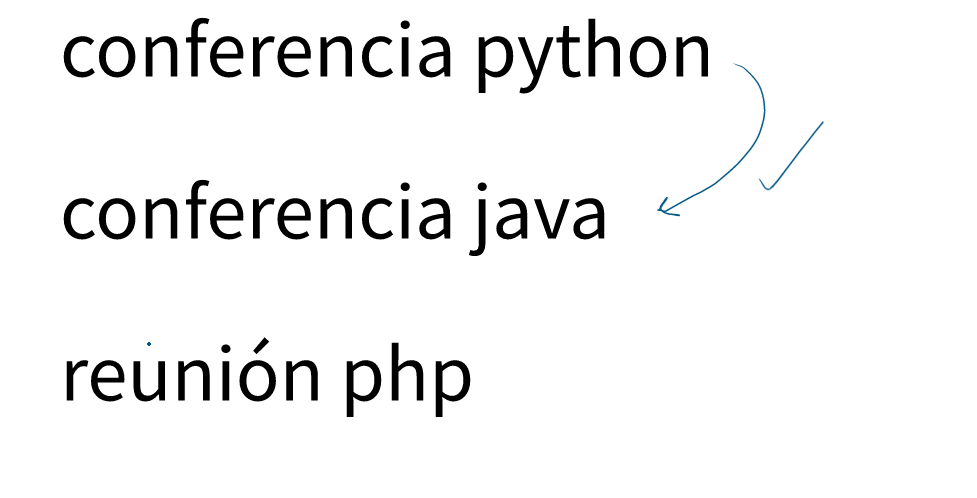

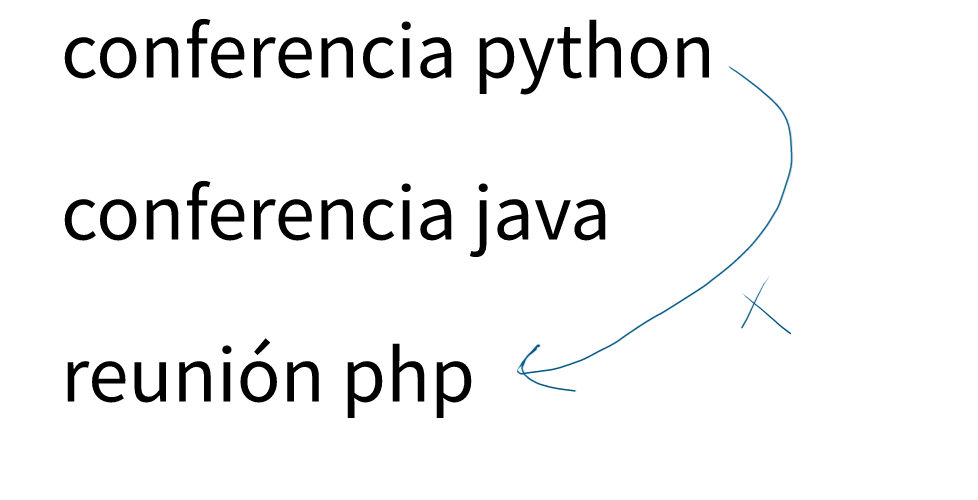

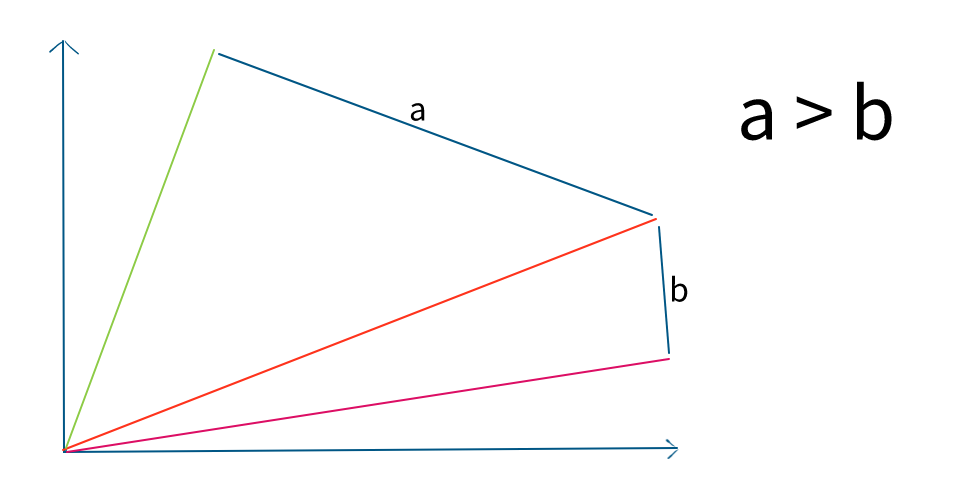

In [ ]:
lines = [
  'python conference',
  'conference',
  'python python',
]

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(lines).toarray()
counts

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(counts.T[0], counts.T[1], c=['red', 'green', 'blue'])

plt.ylabel('python')
plt.xlabel('conference')
plt.xlim([-0.1, 2.1])
plt.ylim([-0.1, 2.1])

plt.show()

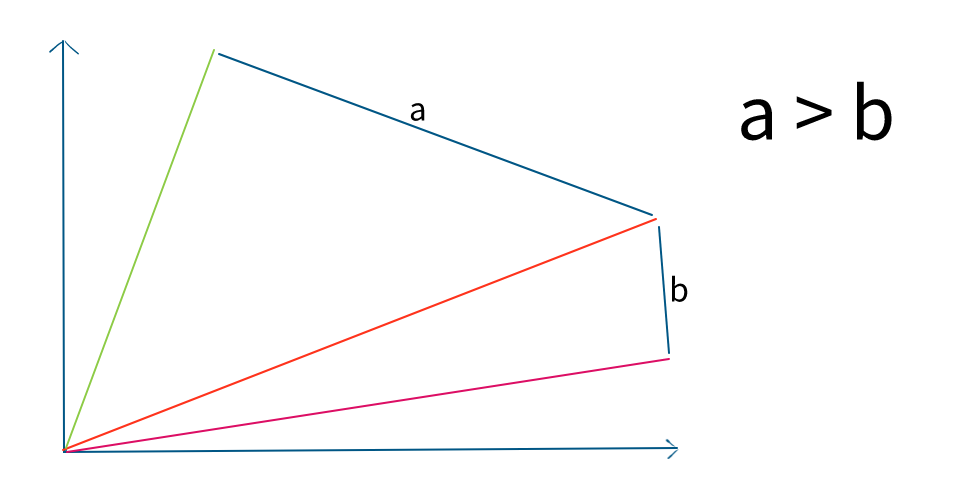

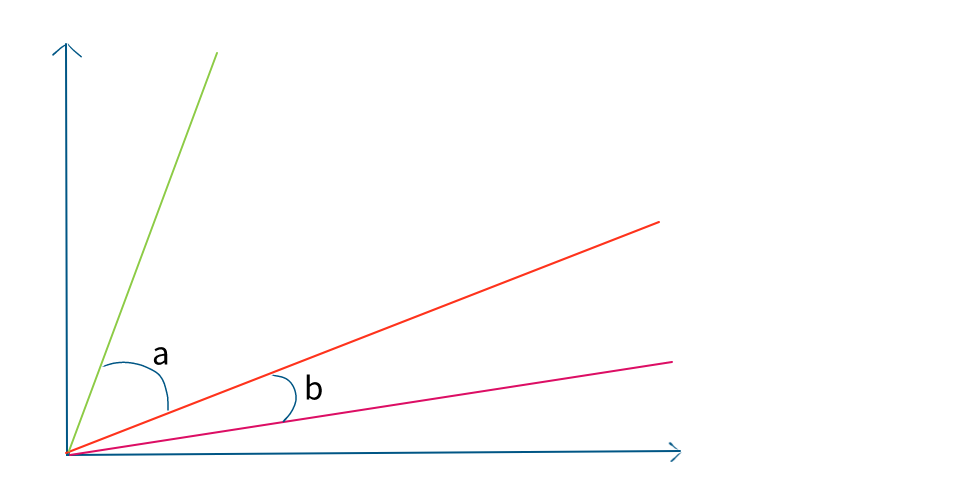

In [ ]:
display(lines)

from sklearn.metrics.pairwise import euclidean_distances

display(euclidean_distances(counts, counts))



from sklearn.metrics.pairwise import cosine_distances

cosine_distances(counts, counts)

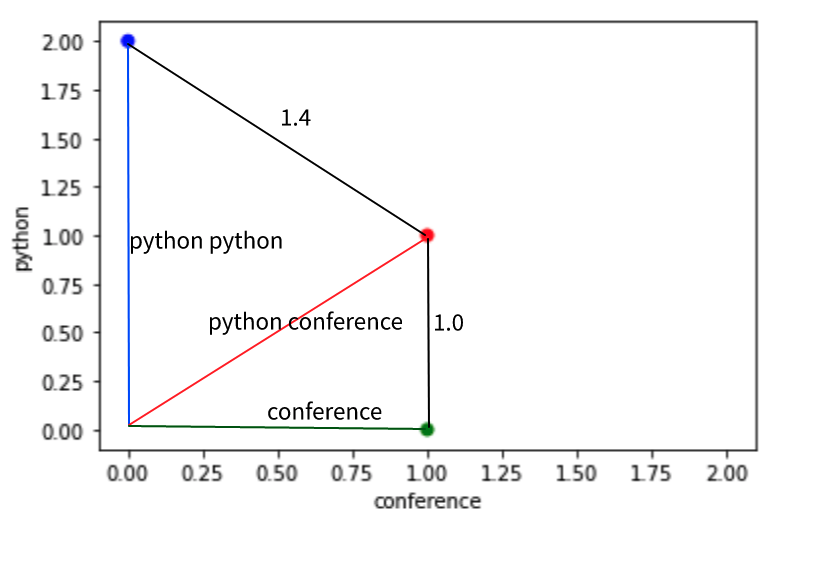

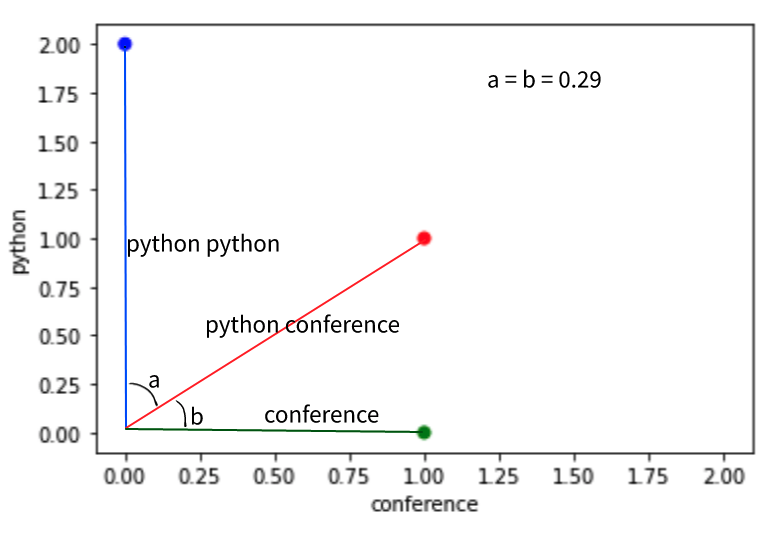

## Cada palabra es una nueva dimensión

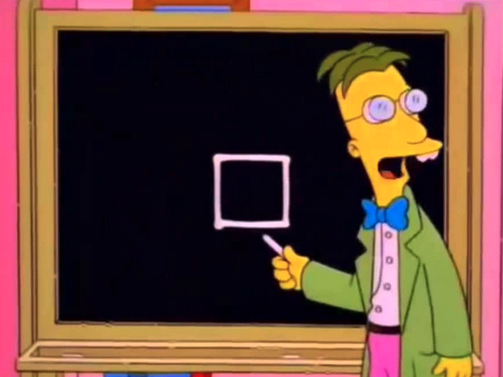

In [ ]:
import IPython

faqs = [
    [
        IPython.display.HTML(
            '<img src="https://static1.srcdn.com/wordpress/wp-content/uploads/2020/09/PS5-Pre-Orders-From-Walmart-Wont-Be-Happening-In-Person.jpg?q=50&fit=crop&w=740&h=370" />'
            '<p>PlayStation 5 es mayormente blanco y parece un router Wi-Fi. El nuevo look blanco es una gran diferencia al acostumbrado color negro de sus predecesores.</p>'
            ),
        'como se ve mira luce aspecto apariencia'
    ],
    [
        IPython.display.HTML('<p>Hay dos versiones del PS5. La versión estándar cuesta 500 dólares y la versión digital tiene un costo de 400 dólares.</p>'),
        'cuanto cuesta costo precio'
    ],
    [
        IPython.display.HTML(
            '<img src="https://static1.srcdn.com/wordpress/wp-content/uploads/2020/07/PS5-Blue-Tint.jpg?q=50&fit=crop&w=740&h=370" />'
            '<p>La diferencia entre la versión estándar y la versión digital es que la segunda no cuenta con una unidad de disco.</p>'),
        'diferencia versiones'
    ],
    [
        IPython.display.HTML('<p>La fecha de salida del nuevo PS5 es el 12 de Noviembre para México y otros países.</p>'),
        'cuando sale'
    ],
    [
        IPython.display.HTML('<p>PlayStation 5 cuenta con especificaciones increíbles, incluye un SSD para ray-tracing y carga rápida.</p>'),
        'specs hardware procesador memoria'
    ],
    [
        IPython.display.HTML('<p>El PlayStation5 incluye un control dualshock, cable HDMI, adaptador de corriente, cable USB y manual.</p>'),
        'caja incluye'
    ],
    [
        IPython.display.HTML('<p>En el anterior PS4, se podía utilizar un ratón y teclado por lo que se piensa que el nuevo PS5 también lo soportará <em>aunque Sony aún no lo ha confirmado.</em></p>'),
        'mouse keyboard usb perifericos entrada dispositivo'
    ],
    [
        IPython.display.HTML('<p>Un SSD es un disco de estado sólido, no tiene partes mecánicas lo que hace que alcance velocidades muy superiores a un disco convencional.</p>'),
        'ssd ssd ssd' # esto incrementa la importancia del término SSD en esta pregunta
    ],
    [
        IPython.display.HTML('<p>Aunque PS5 soportará definiciones de 8K, pienso que lo mejor sería utilizar un televisor 4K con frecuencia de 60hz.</p>'),
        'mejor television resolucion pantalla monitor'
    ],
    [
        IPython.display.HTML('<p>Aquí hay un vídeo que te puede ayudar</p><iframe width="750" height="422" src="https://www.youtube.com/embed/IKwI0tae24w" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'),
        'interfaz grafica menus ui'
    ]
    
]

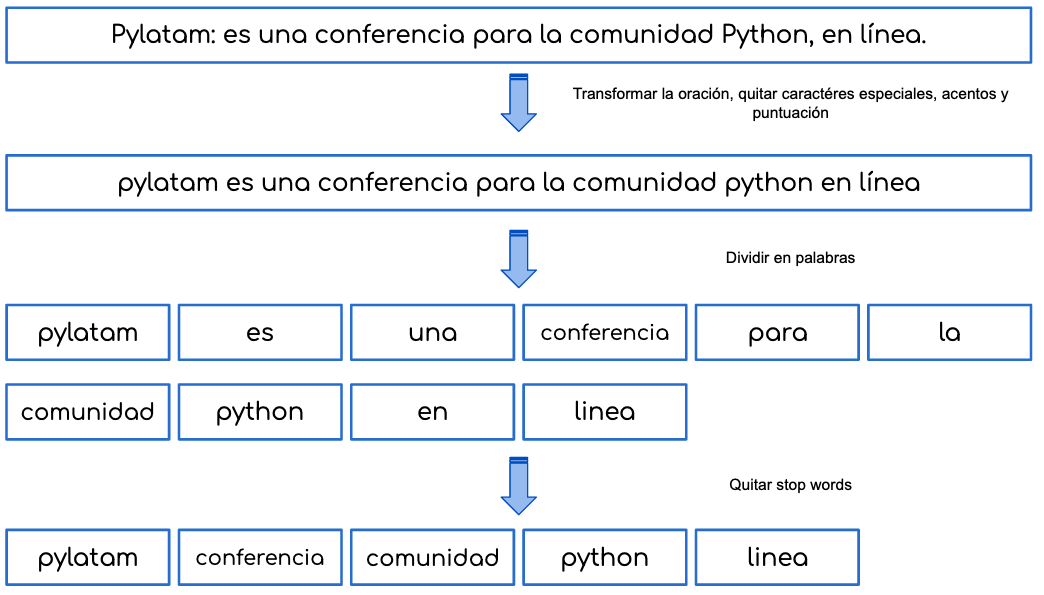

In [ ]:
import re
import string

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

stemmer = SnowballStemmer('spanish')
stops = stopwords.words('spanish')

# Excluir términos comunes
stops.extend(['ps5', 'play', 'station', 'playstation', 'ps', '5'])

def process_sentence(q):
    trans_punct = str.maketrans(dict.fromkeys(string.punctuation))
    
    # remueve etiquetas html
    q = re.sub('<.+?>', '', q)
    
    # convierte a minúsculas, remueve acentos y puntuación
    q = q.lower().translate(str.maketrans('áéíóú', 'aeiou')).translate(trans_punct)
    
    # remueve stops words, divide por palabras y obtiene su raíz
    return " ".join([stemmer.stem(word) for word in q.split(' ') if word not in stops])

In [ ]:
process_sentence("<p>¿Cuál es la próxima plática a la que irás en pylatam?</p>")

In [ ]:
dict.fromkeys(string.punctuation)

In [ ]:
# Si todo se trata sobre pylatam…
stops.extend(['pylatam'])

def process_sentence(q):
  punctuation = dict.fromkeys(string.punctuation)
  punctuation['¿'] = None
  punctuation['¡'] = None
  trans_punct = str.maketrans(punctuation)
    
  # remueve etiquetas html
  q = re.sub('<.+?>', '', q)
    
  # convierte a minúsculas, remueve acentos y puntuación
  q = q.lower().translate(str.maketrans('áéíóú', 'aeiou')).translate(trans_punct)
    
  # remueve stops words, divide por palabras y obtiene su raíz
  return " ".join([stemmer.stem(word) for word in q.split(' ') if word not in stops])

In [ ]:
process_sentence("<p>¿Cuál es la próxima plática a la que irás en pylatam?</p>")

In [ ]:
def get_text(display):
    if 'HTML' in str(type(display)):
        return display.data
    return display

joined_faqs = [process_sentence(" ".join(map(get_text, f))) for f in faqs]
joined_faqs

Es muy usual regresar URLs a documentos, direcciones de correo electrónico y hasta números de teléfono, *todo eso hubo que removerlo*.

Depende mucho de tu contexto las cosas que debes ir removiendo.


En la empresa hay términos que significan lo mismo:

vales de despensa
tarjeta de vales
vales
sivale
food coupons

Existe un diccionario donde se reemplazan todos estos términos por uno sólo.

In [ ]:
vectorizer = CountVectorizer()
display(vectorizer.fit_transform([" ".join(map(get_text, f)) for f in faqs]).toarray().shape)

vectorizer = CountVectorizer()
count_faqs = vectorizer.fit_transform(joined_faqs)
display(count_faqs.toarray().shape)

In [ ]:
question = "¿el ps5 incluye un dualshock?"

count_question = vectorizer.transform([process_sentence(question)])
count_question.toarray()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

list(enumerate(
    
    cosine_similarity(count_faqs, count_question)
    
))

In [ ]:
display(faqs[5][0])

In [ ]:
def get_answer(question):
  processed_question = process_sentence(question)
  # Es importante enviarlo como una lista de un solo elemento
  count_question = vectorizer.transform([processed_question])

  similarities = enumerate(cosine_similarity(count_faqs, count_question))
  answer = sorted(
      similarities,
      key=lambda i: i[1][0],
      reverse=True
  )[0]   # primer elemento

  if answer[1] != 0:
    return faqs[answer[0]][0]
  
  return None

No siempre vas a encontrar una respuesta exacta, por lo que recomiendo regresar respuestas más ambiguas que un sí o un no.

Como en el caso anterior, la misma respuesta también puede contestar a la pregunta _¿qué se incluye con el ps5?_

In [ ]:
get_answer("¿qué se incluye con el ps5?")

In [ ]:
get_answer("cual es la apariencia")

In [ ]:
fn_continue = lambda: True

context = {
    'started': False
}

# Se usa aquí una serie de callbacks para darle más opciones a las respuesta además de imprimir un mensaje
# aunque al final no le saqué mucho provecho

def start_conversation():
    context['started'] = True
    return 'Hola, ¿en qué puedo ayudarte?'

def finish_conversation():
    message = 'Que tengas buen día' if context['started'] else 'Ok.'
    context['started'] = False
    return message

bienvenida = {
    'msg': start_conversation,
    'callback': fn_continue
}

despedida = {
    'msg': finish_conversation,
    'callback': lambda: False
}

de_nada = {
    'msg': lambda: 'No hay de qué',
    'callback': fn_continue
}

saludos = {
    'hola': bienvenida,
    'adios': despedida,
    'bye': despedida,
    'hasta luego': despedida,
    'buenas tardes': bienvenida,
    'buenos dias': bienvenida,
    'gracias': de_nada,
    'agrade': de_nada,
}


regex = "|".join(saludos.keys())

In [ ]:
def preguntar():
    raw_q = input('Pregunta: ')
    q = raw_q
    match = re.search(regex, q)
    s = match.group(0) if match else None

    # Intentar con un saludo fijo, esto no consulta el tfidf
    if s in saludos:
        print(saludos[s]['msg']())
        cb = saludos[s]['callback']()
        if cb == False:
            return False
    else:
      if not context['started']:
        print(saludos['hola']['msg']())
      answer = get_answer(q)
      if answer:
        display(answer)
      else:
        print('No tengo respuesta a eso')
    return True

In [ ]:
while preguntar():
    pass

Este notebook se puede encontrar en:

https://gitlab.com/juanjosegzl/chatbot-pylatam-2021